# COMS 4995 AML Group Project 
   
  
## Topic: Airline Passenger Satisfaction  
  
  
**Group 2 Members:**  

**Anqi Xue, ax2170  
Tanisha Aggrawal, ta2709  
Vishal Bhardwaj, vb2573**

## The Dataset


### Description

This data set contains details of an airline passenger satisfaction survey and the target variable is a binary variable reflecting the airline satisfaction level (satisfied, neutral or dissatisfied) of a passenger.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import GridSearchCV

%matplotlib inline

## Part 1: Data Preprocessing  

**1.1: Load the datasets**

In [4]:
dev_df = pd.read_csv('train_and_validation.csv', index_col = 0)
test_df = pd.read_csv('test.csv', index_col = 0)

In [5]:
dev_df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [6]:
test_df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


**1.2: Missing values analysis**

We remove the information about the passenger (the whole row) if part of their data is missing. 


In [7]:
# Checking null values in dev dataset
np.any(dev_df.isnull() == True)

True

In [8]:
#drop the whole row with null value(s) in dev set
dev_df = dev_df.dropna(axis = 0, how = 'any')
dev_df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


310 rows have been removed from the dev set, that is, 310 samples had at least one null value.

In [9]:
# Checking null values in test dataset
np.any(test_df.isnull() == True)

True

In [10]:
#drop the whole row with null value(s) in test set
test_df = test_df.dropna(axis = 0, how = 'any')
test_df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


83 rows have been removed from the test set, that is, 83 samples had at least one null value.

**1.3: Explain the distribution of the target variable and the dataset**

Text(0, 0.5, 'Distribution of target variable')

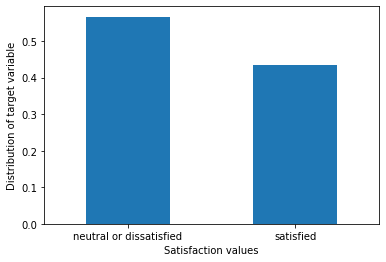

In [11]:
dev_df['satisfaction'].value_counts(normalize = True).plot(kind='bar', rot=0)
plt.xlabel('Satisfaction values')
plt.ylabel('Distribution of target variable')

**1.4: Drop the columns**  
We drop the id column because this information is irrelevant to the target output

In [12]:
X_dev = dev_df.drop(columns = ['id', 'satisfaction'])
X_test = test_df.drop(columns = ['id', 'satisfaction'])

In [ ]:
y_dev = dev_df['satisfaction']
y_test = test_df['satisfaction']

**1.5: Exploratory Data Analysis** 

In [13]:
#Description of the columns in the Dataframe
X_dev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103594 non-null  object 
 1   Customer Type                      103594 non-null  object 
 2   Age                                103594 non-null  int64  
 3   Type of Travel                     103594 non-null  object 
 4   Class                              103594 non-null  object 
 5   Flight Distance                    103594 non-null  int64  
 6   Inflight wifi service              103594 non-null  int64  
 7   Departure/Arrival time convenient  103594 non-null  int64  
 8   Ease of Online booking             103594 non-null  int64  
 9   Gate location                      103594 non-null  int64  
 10  Food and drink                     103594 non-null  int64  
 11  Online boarding                    1035

In [14]:
#Segragating features into continuous-value features, numerical rating features, and categorical features
num_feats = list(X_dev.select_dtypes(['number']).columns)
continuous_feats = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
rating_feats = [feat for feat in num_feats if feat not in continuous_feats]
cat_feats = list(X_dev.select_dtypes(['object']).columns)

satisfaction  neutral or dissatisfied  satisfied
Gender                                          
Female                          30107      22469
Male                            28590      22428
satisfaction       neutral or dissatisfied  satisfied
Customer Type                                        
Loyal Customer                       44249      40413
disloyal Customer                    14448       4484
satisfaction     neutral or dissatisfied  satisfied
Type of Travel                                     
Business travel                    29831      41634
Personal Travel                    28866       3263
satisfaction  neutral or dissatisfied  satisfied
Class                                           
Business                        15143      34390
Eco                             37922       8671
Eco Plus                         5632       1836


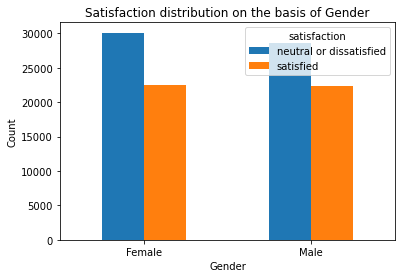

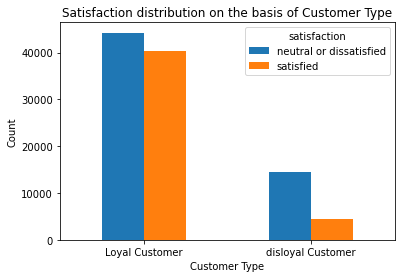

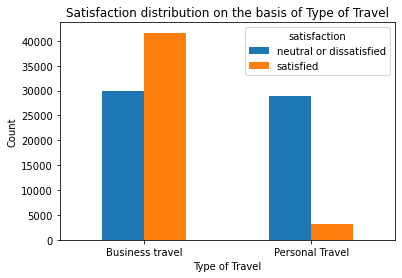

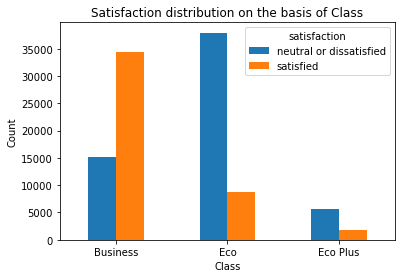

In [15]:
#Categorical Features Analysis
for feature in cat_feats:
  print(dev_df.groupby([feature, 'satisfaction']).size().unstack())
  dev_df.groupby([feature, 'satisfaction']).size().unstack().plot(kind='bar', rot=0)
  plt.ylabel('Count')
  plt.title('Satisfaction distribution on the basis of '+ feature)

* Consistent distribution of target variable in each category for the features Gender and Customer Type.
* Similar number of ‘Males’ and ‘Females’ in the Dev set.
* Almost 4.5 times more loyal customers than disloyal customers.
*Number of dissatisfied customers is similar for customers travelling for business and personal purposes.
* 58% customers travelling for business purposes are satisfied whereas only 10% of customers travelling for personal purposes are satisfied.
* Only 2940 more customers travelled in Business than Eco.
* 69.5% customers travelling in Business class were satisfied whereas only 18.6% customers travelling in Eco class were satisfied.
* Only 7.2% customers travelled in Eco Plus.

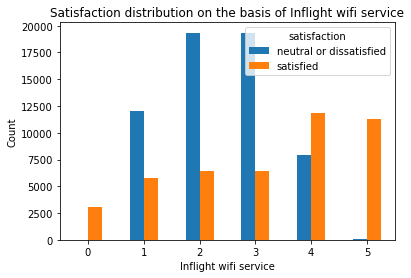

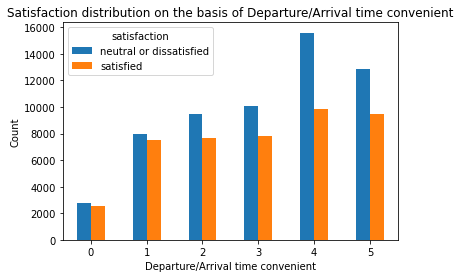

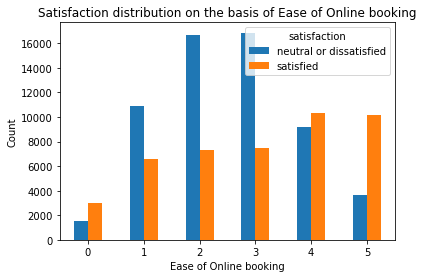

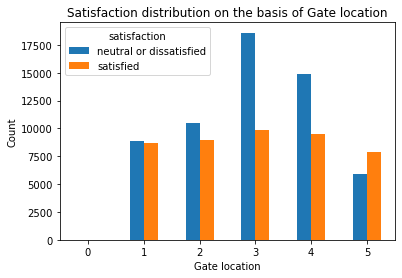

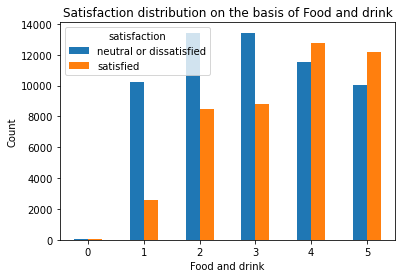

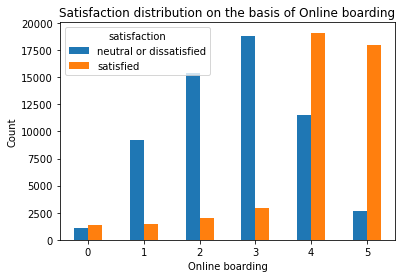

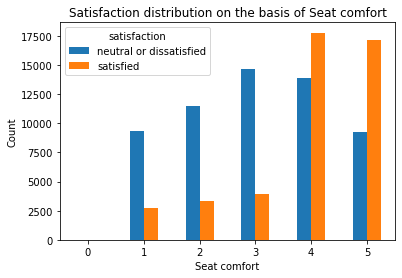

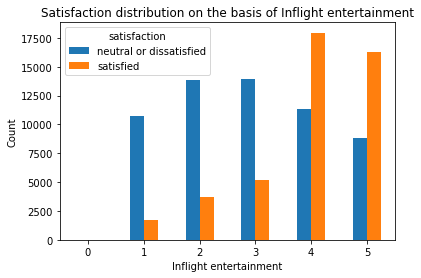

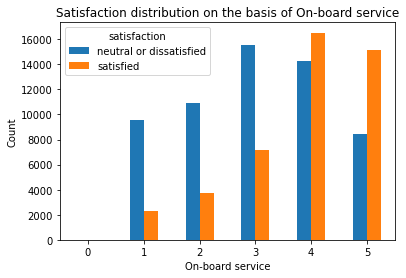

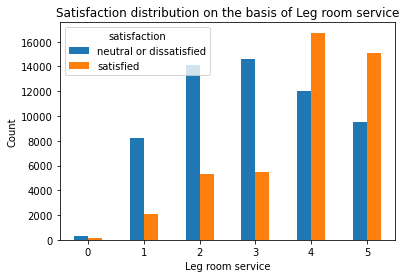

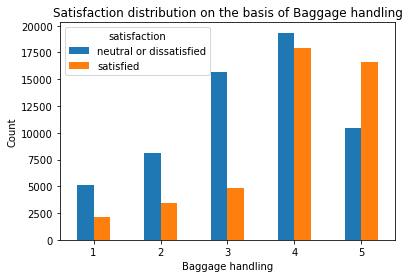

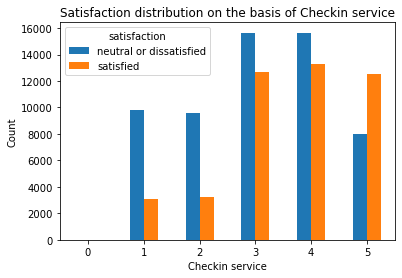

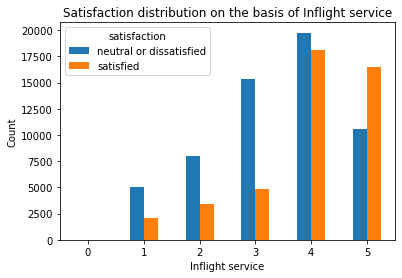

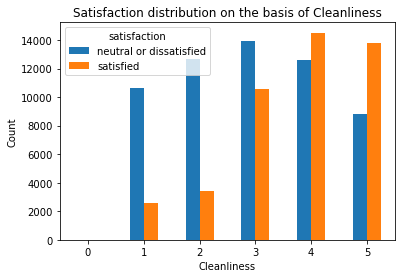

In [16]:
#Numerical Ratings based features Analysis
for feature in rating_feats:
  dev_df.groupby([feature, 'satisfaction']).size().unstack().plot(kind='bar', rot=0)
  plt.ylabel('Count')
  plt.title('Satisfaction distribution on the basis of '+ feature)

In [ ]:
#Age vs Satisfaction Analysis
dev_df.groupby(['Age', 'satisfaction']).size().unstack().plot(kind='bar', rot=0, figsize=(20,16))
plt.ylabel('Count')
plt.title('Satisfaction distribution on the basis of Age')